# Defacing pre-registration - Statistical analysis on image quality metrics (IQMs) in R

## Load IQMs dataframe

In [77]:
library(arrow)
iqms_df <- read.csv(file = 'iqms_df.csv')

iqms_df

X.1,subject,A,B,C,D,E,F,G,H,⋯,X..2,X..3,X..4,X..5,X..6,X..7,X..8,X..9,defaced,site
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1,0.888101931,0.95141318,0.755523154,0.76150185,0.834696741,0.76060151,0.1792498866,0.70594339,⋯,0.05962254,0.23004332,0.35502427,0.75479481,0.47512362,0.37827492,0.052236449,0.10949562,0,1
1,2,0.407770187,0.37015080,0.813923301,0.01975641,0.226272878,0.07845983,0.0680227098,0.95422938,⋯,0.38402619,0.79095243,0.03153761,0.71208873,0.65605558,0.97286155,0.500268010,0.96760631,0,1
2,3,0.001942778,0.81393894,0.824818924,0.65012325,0.613852950,0.79309227,0.5257070505,0.52038171,⋯,0.27994057,0.64252915,0.30093692,0.42620779,0.89902450,0.36593172,0.971136013,0.65342610,0,1
3,4,0.762181238,0.07477031,0.760510060,0.63329418,0.078044072,0.71175720,0.4566786461,0.93202097,⋯,0.59431201,0.14393839,0.75741539,0.72776167,0.95717420,0.08942542,0.009151363,0.60252983,0,1
4,5,0.797820879,0.45385875,0.609823339,0.29539033,0.327321725,0.66633475,0.6642816468,0.13241528,⋯,0.49716149,0.09401781,0.93697653,0.31222359,0.32263038,0.59855396,0.439931725,0.02257622,0,1
5,6,0.744371743,0.99652663,0.305494889,0.06734006,0.157031958,0.91123598,0.6627938397,0.25152662,⋯,0.88230393,0.78490044,0.86452675,0.10895865,0.97897483,0.90878453,0.753191504,0.27352799,0,1
6,7,0.432631424,0.98548887,0.235137930,0.42307213,0.151277628,0.36062823,0.4467873539,0.86690739,⋯,0.51101829,0.58947615,0.56519716,0.68213754,0.08555502,0.42679484,0.068022536,0.56206705,0,1
7,8,0.415125327,0.11539607,0.130727380,0.31985264,0.002703157,0.78478849,0.8811772931,0.95573456,⋯,0.48121647,0.19967638,0.20558761,0.72212931,0.69008722,0.50336071,0.262070652,0.54505221,0,1
8,9,0.333885162,0.90661233,0.612417017,0.13327792,0.441996008,0.96656500,0.9213259975,0.78260542,⋯,0.81481623,0.91575610,0.10529692,0.91700417,0.95479895,0.04928263,0.774593562,0.01921712,0,1


The dataframe has been put together by running `LoadIQMs.py`

## Run PCA

The fact that many IQMs are heavily correlated represents a violation to the independency assumption of MANOVA. To remedy to this issue, we run PCA on the IQMs to extract ?? principal components. It is important to perform the PCA separately on the IQMs from the defaced and non-defaced condition to not mix up the defacing influence.

In [81]:
#Separate IQMs from the defaced and non-defaced condition
df_original <- subset(iqms_df, defaced == 0)
df_defaced <- subset(iqms_df, defaced == 1)

pca_original <- prcomp(df_original[c(-1,-2,-ncol(df_original), -ncol(df_original)+1)], scale=TRUE, retx=TRUE)
pca_defaced <- prcomp(df_defaced[c(-1,-2, -ncol(df_original), -ncol(df_original)+1)], scale=TRUE, retx=TRUE)

#IQMs projected onto the PCA basis
projected_iqms <- rbind(pca_original$x, pca_defaced$x)

#Recombine the projected IQMs into a dataframe
defaced <- iqms_df$defaced
site <- iqms_df$site
subject <- iqms_df$subject
projected_iqms_df <- cbind(subject, projected_iqms, defaced, site)
projected_iqms_df

,subject,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,⋯,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,defaced,site
1,1,-1.8724400973,-0.1242126,-0.89393701,1.90739369,-0.81159248,-1.79951388,-0.96303998,1.7833434,2.14924846,⋯,-0.4561510,-0.647137737,-0.64917649,-0.113368515,0.56564728,0.32415801,-0.71100483,1.14845407,0,1
2,2,1.4523500944,-1.3029858,1.38193771,0.24316196,1.44387528,-1.70891334,-0.92939983,-1.8673702,1.02766864,⋯,1.7036165,1.208319981,1.23065812,0.351550330,1.10540932,-0.32792383,0.04472491,0.37376061,0,1
3,3,1.7916181609,-2.3833158,-1.22089854,1.65576966,-0.30001821,0.50233047,0.53281586,1.4035552,-2.58099143,⋯,-1.2162521,0.174053623,0.20479736,-0.674109644,0.05748000,-0.05439513,0.95041598,-0.14926496,0,1
4,4,0.7328952947,-0.6761908,-0.66612050,-1.80662500,-0.14923254,-1.44185051,0.06885175,1.0429941,2.27544972,⋯,0.9645908,-0.080398110,-0.35325111,0.299322418,0.37617120,0.31527798,0.23469598,-0.14010910,0,1
5,5,0.0308274937,1.0749393,1.09780127,0.90683028,-0.48715202,-0.26897824,0.56303881,-0.2787285,-0.05842465,⋯,-0.1219778,-0.261114820,0.37104462,-0.329661505,-0.17311091,-1.38288852,-0.34999062,-0.39030031,0,1
6,6,0.7108685733,0.2866679,-2.23756635,-0.58633432,-1.66266375,0.38408076,0.70887522,1.1052294,-0.68049325,⋯,-0.2835912,0.134090539,-0.92285688,-0.551437292,-0.57649651,-0.32286369,-1.07538344,-0.21331032,0,1
7,7,-0.3146436654,0.4670782,0.75615128,0.79753894,0.13840919,-0.75056456,2.06805787,2.1222808,0.27506806,⋯,-0.0325937,0.334181658,0.44926680,-0.450020449,-0.60470185,1.04993298,-0.08612402,0.52471347,0,1
8,8,-0.7944189054,0.5043277,0.07326068,-2.59212840,-0.14550944,-1.11106943,1.21076748,0.2322823,-1.02104316,⋯,0.6115271,-0.511281442,2.15466541,-0.088093822,-0.20593895,0.08347944,-0.61643828,-1.01449811,0,1
9,9,-1.8375589437,0.1020704,-3.31165165,-0.91458332,2.47905360,1.46315710,1.52442238,-1.2898569,0.59009187,⋯,0.8301057,0.152822959,1.00359914,-0.193608009,-0.11777403,0.16620552,-0.22050769,-0.63195439,0,1
10,10,-0.5069689483,2.6253934,-1.69124980,-1.68067917,-0.84884548,1.04764752,-0.27285383,1.3281060,0.61063452,⋯,0.4229996,0.137799715,1.83358087,-0.411280804,1.20638028,1.17143358,-1.48744346,-0.50610776,0,1


#### Choose number of principal components

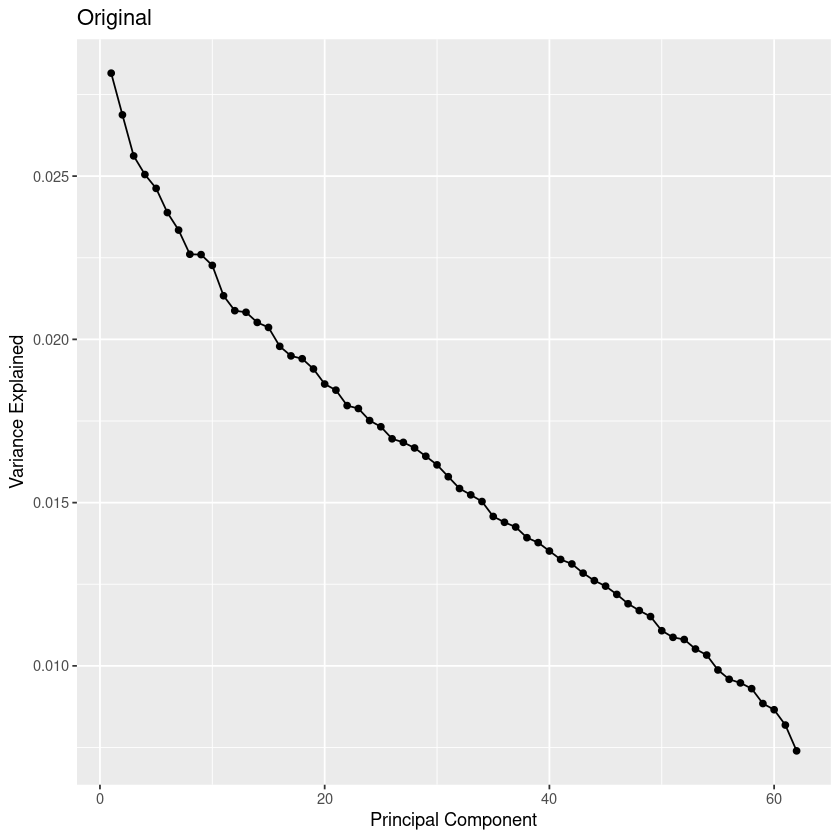

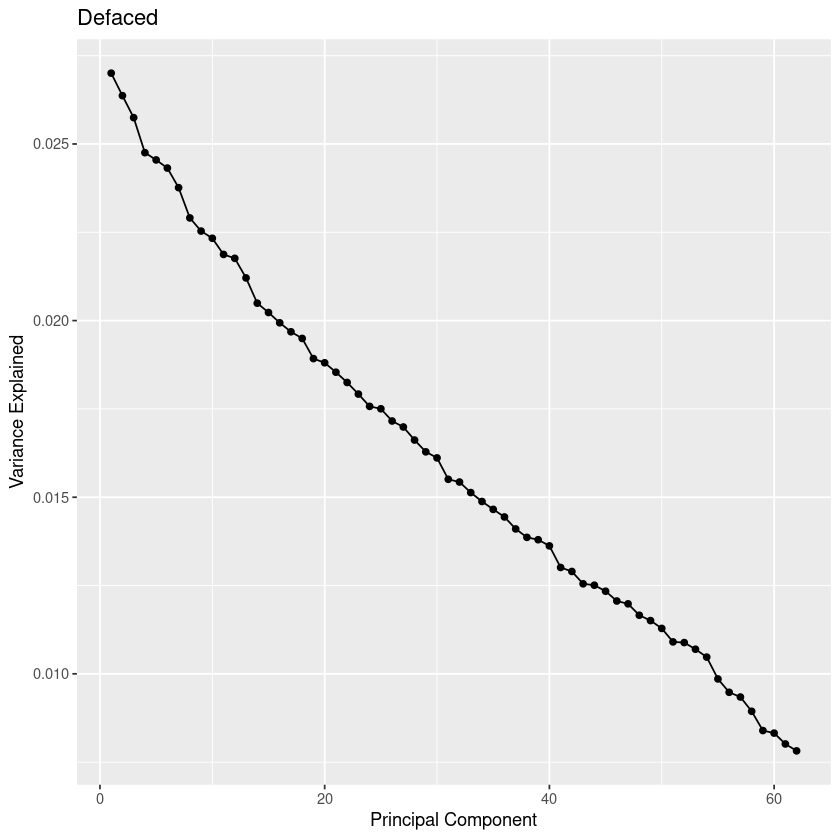

In [79]:
#calculate total variance explained by each principal component
var_explained_o = pca_original$sdev^2 / sum(pca_original$sdev^2)
var_explained_d = pca_defaced$sdev^2 / sum(pca_defaced$sdev^2)

#create scree plot
library(ggplot2)

qplot(c(1:length(var_explained_o)), var_explained_o) +  
  geom_line() + 
  xlab("Principal Component") + 
  ylab("Variance Explained") +
  ggtitle("Original")

qplot(c(1:length(var_explained_d)), var_explained_d) + 
  geom_line() + 
  xlab("Principal Component") + 
  ylab("Variance Explained") +
  ggtitle("Defaced")

## Run MANOVA

In [83]:
library(MANOVA.RM)

#Construct formula
dep_var <- ''
col_names <- colnames(projected_iqms_df)
#Remove non-iqms column names
iqms_keys <- iqms_keys[c(-1,-2,-length(col_names),-length(col_names)+1)]
for (key in iqms_keys){
    dep_var <- paste(dep_var, sprintf('%s +',key))
}
dep_var = substring(dep_var,1, nchar(dep_var)-2)

my_formula <- as.formula(paste(dep_var, " ~ site * defaced"))
my_formula

fit <- multRM(my_formula, data = projected_iqms_df, subject = 'subject', within = 'defaced')
summary(fit)

C + D + E + F + G + H + I + J + K + L + M + N + O + P + Q + R + 
    S + T + U + V + W + X + Y + Z + a + b + c + d + e + f + g + 
    h + i + j + k + l + m + n + o + p + q + r + s + t + u + v + 
    w + x + y + z + X. + X..1 + X..2 + X..3 + X..4 + X..5 + X..6 + 
    X..7 + X..8 + X..9 ~ site * defaced

ERROR: Error in C + D: non-numeric argument to binary operator


# Comparison of the covariance matrices

In [ ]:
library(heplots)

boxM(iqms_df[,4:ncol(iqms_df)-1], iqms_df[,ncol(iqms_df)])

Box's (1949) M-test tests for homogeneity of covariance matrices. The null hypothesis for this test is that the observed covariance matrices are equal across groups. In other words, a non-significant test result indicates that the covariance matrices are equal.